In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline

# Predicting Housing Costs

I want to make a model than can predict housing prices. However, I don't just want to be able to predict the price of a house, I want insight into how the price is determined.  I want to know what aspects or features of a house are most important in determining price. 

To accomplish this, I will use data from the Melborne housing market.

In [2]:
housing = pd.read_csv('C:\Code\Data\melbourne.csv')

In [3]:
housing = housing.dropna()
print(housing.shape)
display(housing.head())

(8887, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


The data has 8887 rows by 21 columns. 


# Modeling the Data 

Data is too large for more complex models, I can only model part of it. As such, I will split the data into training and testing splits of data. Additionally, I will drop the columns, 'SellerG' (real estate agent), 'Address'(address of the house), 'Lattitude', 'Longtitude', and 'Distance'(distance to agent) columns.

In [4]:
# initialize variables
X = housing.drop(housing[['Price','SellerG','Address','Lattitude','Longtitude','Distance']], 1)
Y = housing['Price']
# get dummy variables for x
X = pd.get_dummies(X)


### Adaptive Boosted Decision Tree

In [5]:
abr = AdaBoostRegressor(DecisionTreeRegressor())
abr.fit(X,Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [6]:
print("R squared for Adaptive Boosted Decision Trees:")
print(abr.score(X,Y))
score_ols = cross_val_score(abr, X, Y, cv=10)
print("\nError: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))

R squared for Adaptive Boosted Decision Trees:
0.9995552544366445

Error: 0.77 (+/- 0.09)


### Random Forest

In [7]:
rfr = RandomForestRegressor()
rfr.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
print("R squared for Random Forest:")
print(rfr.score(X,Y))
score_ols = cross_val_score(rfr, X, Y, cv=10)
print("\nError: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))

R squared for Random Forest:
0.962963481150247

Error: 0.76 (+/- 0.10)


### Gradient Boosted Decision Tree

In [9]:
gbr = GradientBoostingRegressor()
gbr.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [10]:
print("R squared for Gradient Boosted Decision Trees:")
print(gbr.score(X,Y))
score_ols = cross_val_score(gbr, X, Y, cv=10)
print("\nError: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))

R squared for Gradient Boosted Decision Trees:
0.8098013123669009

Error: 0.74 (+/- 0.10)


The adaptive boosted tree certainly seems to be the best performing model. Not only does it have the best R-squared valued, but it also shows the least signs of overfitting. 

While the random forest may not perform as well as the adaptive one, it is still a strong and usuable model, showing slightly more signs of overfitting. 

The boosted decision tree functions the worst overall by far, having an error score well below useability and a comparatively abyssmal cross validation score. 

# Finding Feature Importance

From the start, I wanted to know what variables where the most impactful when predicting the price of a house.

Now that which models I can rely on, I will determine the feature imporance according to my model. First, I will extract the feature importance from the adaptive boosted model and the random forest model. Then, I will plot the feature importances of each to get a bettere idea of which features are most important when determining the price of a house.

In [11]:
# store importances from adaptive boosted tree and random forest
feature_importance_abr = abr.feature_importances_
feature_importance_rfr = rfr.feature_importances_

# sort adaptive boosted importances
sorted_idx_abr = np.argsort(feature_importance_abr)
pos_abr = np.arange(sorted_idx_abr.shape[0])
# split adaptive boosted dummy names apart
dummy_fnames_abr = pd.Series(X.columns[sorted_idx_abr])
dummy_fsplit_abr = dummy_fnames_abr.str.split('_')
# create of list of the original column of each dummy variable
feature_names_abr =[]
for n in dummy_fsplit_abr:
    feature_names_abr.append(n[0])
    
# sort random forest importances
sorted_idx_rfr = np.argsort(feature_importance_rfr)
pos_rfr = np.arange(sorted_idx_rfr.shape[0])
# split dummy names apart
dummy_fnames_rfr = pd.Series(X.columns[sorted_idx_rfr])
dummy_fsplit_rfr = dummy_fnames_rfr.str.split('_')
# create of list of the original column of each dummy variable
feature_names_rfr =[]
for n in dummy_fsplit_rfr:
    feature_names_rfr.append(n[0])
    
# initiate feature importance dataframe    
fi = pd.DataFrame()
fi['name_abr'] = feature_names_abr
fi['importance_abr'] = pos_abr
fi['name_rfr'] = feature_names_rfr
fi['importance_rfr'] = pos_rfr

# average the importance of all features
fi_abr = fi[['importance_abr','name_abr']].groupby('name_abr').mean()
# sort fi by importance
fi_abr = fi_abr.sort_values(by='importance_abr')
# set feature importance relative to a max
fi_abr['importance'] = 100.0 * (fi_abr['importance_abr'] / fi_abr['importance_abr'].max())
# average the importance of all features
fi_rfr = fi[['importance_rfr','name_rfr']].groupby('name_rfr').mean()
# sort fi by importance
fi_rfr = fi_rfr.sort_values(by='importance_rfr')
# set feature importance relative to a max
fi_rfr['importance'] = 100.0 * (fi_rfr['importance_rfr'] / fi_rfr['importance_rfr'].max())

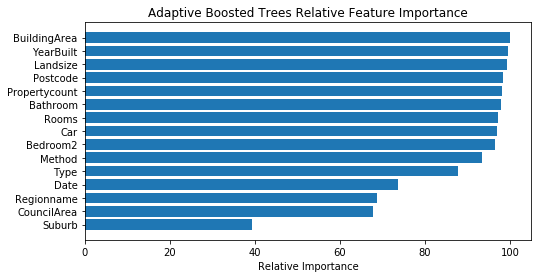

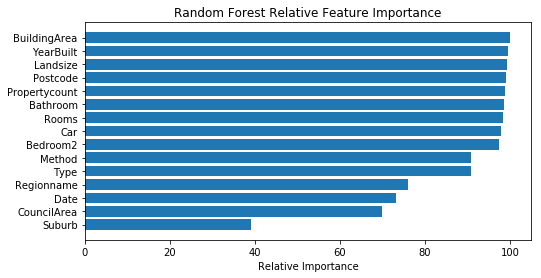

In [12]:
# plot adaptive boosted importances
plt.figure(figsize=(8, 4))
plt.barh(list(fi_abr.index), fi_abr['importance'], align='center')
plt.yticks(list(fi_abr.index))
plt.xlabel('Relative Importance')
plt.title('Adaptive Boosted Trees Relative Feature Importance')
plt.show()

# plot random forest importances
plt.figure(figsize=(8, 4))
plt.barh(list(fi_rfr.index), fi_rfr['importance'], align='center')
plt.yticks(list(fi_rfr.index))
plt.xlabel('Relative Importance')
plt.title('Random Forest Relative Feature Importance')
plt.show()

# Conclusion

Both of my models have similar predictions for feature importance, making me feel more confident in their importance estimations.

Both models think that __BuildingArea__, __YearBuilt__, __LandSize__, and __Postcode__ are the top 4 most important features. From there, the models swap between __Propertycount__ and __Bathroom__ as the most 5th and 6th most important. 

Both agree that __Rooms__ is the 7th most important. Then, the models again swap between __Bedroom2__ and __Car__ as the 8th and 9th most important features. And again, the models swap between __Type__ and __Method__ as the 10th and 11th most important features.

Finally, both agree that __Date__, __RegionName__, __CouncilArea__, and __Suburb__ are the least important features at 12th, 13th, 14th, and 15th.

While there may be some uncertainty on the exact value and placement of certain features' importances, I now have a pretty good idea what are the most important aspects for a house's price on the market. 

https://www.kaggle.com/anthonypino/melbourne-housing-market